In [14]:
import pandas as pd
from pathlib import Path
fold_path = Path("../datasets/IM2GPS/human_geolocation_test_anon/")
stuff = pd.read_csv(fold_path/'coords.csv')
eval_set = stuff[stuff.pred.isna() == False]
eval_set

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image,latitude,longitude,pred
0,17,15,35,19b7a195-83f2-47de-b83b-90f01a136b4d.jpg,10.778840,106.688210,"20.9576676, 105.7704907"
1,57,35,58,59a95a76-df66-401e-862c-87ced530535b.jpg,-37.515172,177.190246,"-39.140212, 175.625294"
2,7,27,28,ec447c0e-9b6b-4d78-bcbf-272d74c37eb1.jpg,41.899262,12.472937,"41.8981206, 12.473151699999999"
6,62,32,49,c6574360-2426-4cf7-b044-fe854cc5e873.jpg,41.446972,-117.792663,"42.83516963182199, -120.0284535201455"
17,1,5,57,5636d9ca-e16e-4dc7-a7da-7df22b99a25f.jpg,63.433317,10.373840,"63.4305, 10.3951"
20,0,48,6,0db9c46f-4e2c-41bb-8a35-f2e80967ee93.jpg,51.506699,-0.142908,"51.5069125, -0.1428496"
21,18,0,18,251e07a5-d16b-4f2c-bc50-cb7a4d1e3bf5.jpg,18.986168,72.810859,"18.9828273, 72.8088966"
22,4,9,26,163fcf66-509e-4ef8-a457-f87df38e9b74.jpg,-50.277931,-72.908020,"-50.48307, -73.057708"
25,31,11,50,769de87f-8813-48d4-a871-b86e8869d271.jpg,67.003002,-50.729198,"67.0106004, -50.7109637"
32,24,51,0,85681330-3209-49f9-9109-c7e7ffba9b23.jpg,39.904732,116.416282,"39.916253, 116.39019"


In [20]:
eval_set['pred_lat'] = eval_set.pred.apply(lambda x: float(x.split(', ')[0]))
eval_set['pred_lon'] = eval_set.pred.apply(lambda x: float(x.split(', ')[1]))
eval_set

/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/3093291700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['pred_lat'] = eval_set.pred.apply(lambda x: float(x.split(', ')[0]))
/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/3093291700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['pred_lon'] = eval_set.pred.apply(lambda x: float(x.split(', ')[1]))


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image,latitude,longitude,pred,pred_lat,pred_lon,geoclip_lat,geoclip_lon
0,17,15,35,19b7a195-83f2-47de-b83b-90f01a136b4d.jpg,10.778840,106.688210,"20.9576676, 105.7704907",20.957668,105.770491,21.033300,105.849997
1,57,35,58,59a95a76-df66-401e-862c-87ced530535b.jpg,-37.515172,177.190246,"-39.140212, 175.625294",-39.140212,175.625294,-39.140212,175.625294
2,7,27,28,ec447c0e-9b6b-4d78-bcbf-272d74c37eb1.jpg,41.899262,12.472937,"41.8981206, 12.473151699999999",41.898121,12.473152,41.900592,12.478398
6,62,32,49,c6574360-2426-4cf7-b044-fe854cc5e873.jpg,41.446972,-117.792663,"42.83516963182199, -120.0284535201455",42.835170,-120.028454,45.584666,-118.621166
17,1,5,57,5636d9ca-e16e-4dc7-a7da-7df22b99a25f.jpg,63.433317,10.373840,"63.4305, 10.3951",63.430500,10.395100,63.438450,10.406198
20,0,48,6,0db9c46f-4e2c-41bb-8a35-f2e80967ee93.jpg,51.506699,-0.142908,"51.5069125, -0.1428496",51.506912,-0.142850,51.579903,-0.336714
21,18,0,18,251e07a5-d16b-4f2c-bc50-cb7a4d1e3bf5.jpg,18.986168,72.810859,"18.9828273, 72.8088966",18.982827,72.808897,18.642239,72.875747
22,4,9,26,163fcf66-509e-4ef8-a457-f87df38e9b74.jpg,-50.277931,-72.908020,"-50.48307, -73.057708",-50.483070,-73.057708,-50.483070,-73.057708
25,31,11,50,769de87f-8813-48d4-a871-b86e8869d271.jpg,67.003002,-50.729198,"67.0106004, -50.7109637",67.010600,-50.710964,69.307161,-50.878801
32,24,51,0,85681330-3209-49f9-9109-c7e7ffba9b23.jpg,39.904732,116.416282,"39.916253, 116.39019",39.916253,116.390190,39.916253,116.390190


In [19]:
from src.tools.geo_clip.inference import predict
from PIL import Image
from tqdm import tqdm
for i, row in tqdm(eval_set.iterrows()):
    geoclip_prediction = predict(Image.open(fold_path/row['image']), top_n=1)
    eval_set.at[i, 'geoclip_lat'] = geoclip_prediction[0][0][0]
    eval_set.at[i, 'geoclip_lon'] = geoclip_prediction[0][0][1]
eval_set

17it [00:36,  2.14s/it]


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image,latitude,longitude,pred,pred_lat,pred_lon,geoclip_lat,geoclip_lon
0,17,15,35,19b7a195-83f2-47de-b83b-90f01a136b4d.jpg,10.778840,106.688210,"20.9576676, 105.7704907",20.9576676,105.7704907,21.033300,105.849997
1,57,35,58,59a95a76-df66-401e-862c-87ced530535b.jpg,-37.515172,177.190246,"-39.140212, 175.625294",-39.140212,175.625294,-39.140212,175.625294
2,7,27,28,ec447c0e-9b6b-4d78-bcbf-272d74c37eb1.jpg,41.899262,12.472937,"41.8981206, 12.473151699999999",41.8981206,12.473151699999999,41.900592,12.478398
6,62,32,49,c6574360-2426-4cf7-b044-fe854cc5e873.jpg,41.446972,-117.792663,"42.83516963182199, -120.0284535201455",42.83516963182199,-120.0284535201455,45.584666,-118.621166
17,1,5,57,5636d9ca-e16e-4dc7-a7da-7df22b99a25f.jpg,63.433317,10.373840,"63.4305, 10.3951",63.4305,10.3951,63.438450,10.406198
20,0,48,6,0db9c46f-4e2c-41bb-8a35-f2e80967ee93.jpg,51.506699,-0.142908,"51.5069125, -0.1428496",51.5069125,-0.1428496,51.579903,-0.336714
21,18,0,18,251e07a5-d16b-4f2c-bc50-cb7a4d1e3bf5.jpg,18.986168,72.810859,"18.9828273, 72.8088966",18.9828273,72.8088966,18.642239,72.875747
22,4,9,26,163fcf66-509e-4ef8-a457-f87df38e9b74.jpg,-50.277931,-72.908020,"-50.48307, -73.057708",-50.48307,-73.057708,-50.483070,-73.057708
25,31,11,50,769de87f-8813-48d4-a871-b86e8869d271.jpg,67.003002,-50.729198,"67.0106004, -50.7109637",67.0106004,-50.7109637,69.307161,-50.878801
32,24,51,0,85681330-3209-49f9-9109-c7e7ffba9b23.jpg,39.904732,116.416282,"39.916253, 116.39019",39.916253,116.39019,39.916253,116.390190


In [21]:
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84
eval_set['geoclip_dist'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['latitude'], x['longitude'])['s12']/1000, axis=1)
eval_set['pred_dist'] = eval_set.apply(lambda x: geod.Inverse(x['latitude'], x['longitude'], x['pred_lat'], x['pred_lon'])['s12']/1000, axis=1)
eval_set[['geoclip_dist', 'pred_dist']]

/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/2594491122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['geoclip_dist'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['latitude'], x['longitude'])['s12']/1000, axis=1)
/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/2594491122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['pred_dist'] = eval_set.apply(lambda x: geod.Inverse(x['latitude'], x['longitude'], x['pred_la

,geoclip_dist,pred_dist
0,1138.293828,1130.653853
1,226.405319,226.405319
2,0.476627,0.128023
6,464.556848,240.685732
17,1.713525,1.106833
20,15.719675,0.024097
21,38.679000,0.423610
22,25.180593,25.180593
25,257.075566,1.162041
32,2.571722,2.571722


In [22]:
eval_set['geoclip_dist'].describe()

count      17.000000
mean      159.390512
std       293.171561
min         0.476627
25%         2.571722
50%        25.180593
75%       226.405319
max      1138.293828
Name: geoclip_dist, dtype: float64

In [23]:
eval_set['pred_dist'].describe()

count      17.000000
mean      134.450379
std       292.159675
min         0.024097
25%         1.106833
50%         5.684805
75%        67.977041
max      1130.653853
Name: pred_dist, dtype: float64

<Axes: ylabel='Frequency'>

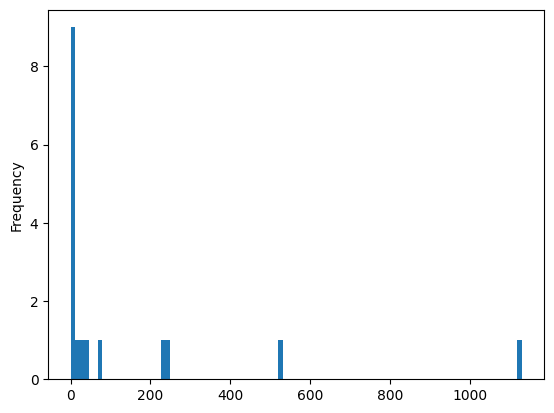

In [36]:
eval_set['pred_dist'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

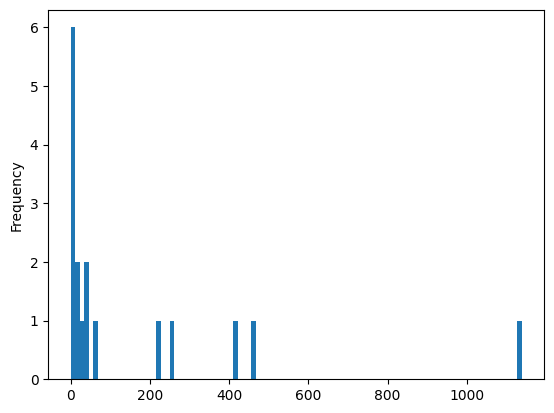

In [37]:
eval_set['geoclip_dist'].plot.hist(bins=100)

In [41]:
len(eval_set[eval_set['geoclip_dist'] < 1]), len(eval_set[eval_set['pred_dist'] < 1])

(2, 4)

In [24]:
eval_set['geoclip_pred_diff'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['pred_lat'], x['pred_lon'])['s12']/1000, axis=1)
eval_set['geoclip_pred_diff']

/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/1345777795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['geoclip_pred_diff'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['pred_lat'], x['pred_lon'])['s12']/1000, axis=1)


0      11.766741
1       0.000000
2       0.514661
6     325.545172
17      1.045090
20     15.710822
21     38.352574
22      0.000000
25    256.247835
32      0.000000
33      1.167569
37      0.061152
41      0.000000
49      2.932737
52     16.203543
56     15.354795
63    674.157268
Name: geoclip_pred_diff, dtype: float64

In [25]:
eval_set['geoclip_pred_diff'].describe()

count     17.000000
mean      79.944704
std      180.251013
min        0.000000
25%        0.061152
50%        2.932737
75%       16.203543
max      674.157268
Name: geoclip_pred_diff, dtype: float64

In [32]:
(eval_set['geoclip_dist'] - eval_set['pred_dist']).describe()

count     17.000000
mean      24.940133
std       86.633892
min     -114.813574
25%        0.000000
50%        0.348604
75%        7.639975
max      255.913525
dtype: float64